In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [3]:
%matplotlib inline

In [5]:
dtype_dict = {'bathrooms':float, 'waterfront':int, 'sqft_above':int, 'sqft_living15':float, 'grade':int, 'yr_renovated':int,
              'price':float, 'bedrooms':float, 'zipcode':str, 'long':float, 'sqft_lot15':float, 'sqft_living':float, 'floors':str,
              'condition':int, 'lat':float, 'date':str, 'sqft_basement':int, 'yr_built':int, 'id':str,
              'sqft_lot':int, 'view':int}

In [13]:
sales=pd.read_csv("D:\Regression\kc_house_data.csv",dtype=dtype_dict)
test_d=pd.read_csv("D:\Regression\kc_house_test_data.csv",dtype=dtype_dict)
train_d=pd.read_csv("D:\Regression\kc_house_train_data.csv",dtype=dtype_dict)

In [14]:
len(sales)

21613

In [15]:
len(test_d)

4229

In [16]:
len(train_d)

17384

In [17]:
sales.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3.0,1.00,1180.0,5650,1,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340.0,5650.0
1,6414100192,20141209T000000,538000.0,3.0,2.25,2570.0,7242,2,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690.0,7639.0
2,5631500400,20150225T000000,180000.0,2.0,1.00,770.0,10000,1,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720.0,8062.0
3,2487200875,20141209T000000,604000.0,4.0,3.00,1960.0,5000,1,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360.0,5000.0
4,1954400510,20150218T000000,510000.0,3.0,2.00,1680.0,8080,1,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800.0,7503.0


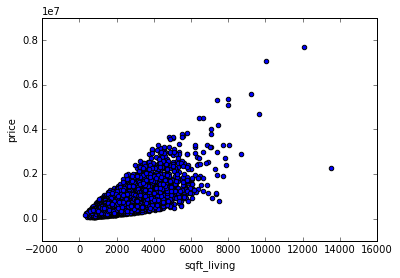

In [18]:
train_d.plot(kind='scatter',x='sqft_living',y='price')

#### Closed form solution

In [41]:
def simple_linear_regression(input_feature,output):
    x=input_feature
    y=output
    x_mean=x.mean()
    y_mean=y.mean()
    xy_mean=(x*y).mean()
    x_var=x.var(ddof=0)   #to use n instead of n-1(default value)
    w1=(xy_mean-(x_mean*y_mean))/x_var     #slope
    w0=y_mean-(w1*x_mean)  #intercept
    return w0,w1

In [56]:
x=train_d['sqft_living']

In [57]:
y=train_d['price']

In [58]:
squarefeet_intercept,squarefeet_slope=simple_linear_regression(x,y)

In [59]:
squarefeet_intercept,squarefeet_slope

(-47116.07907287835, 281.958839630335)

In [61]:
def get_regression_predictions(input_features,intercept,slope):
    predicted_values=intercept+(slope*input_features)
    return predicted_values

In [62]:
get_regression_predictions(2650,squarefeet_intercept,squarefeet_slope)  

700074.8459475094

In [63]:
def get_rss(input_features,output,intercept,slope):
    predicted_values=get_regression_predictions(input_features,intercept,slope)
    error=output-predicted_values
    rss=(error**2).sum()
    return rss

In [64]:
rss=get_rss(x,y,squarefeet_intercept,squarefeet_slope)

In [65]:
rss

1201918354177283.0

In [71]:
def inverse_regression_predictions(output, intercept, slope):
    x=(output-intercept)/slope
    return x

In [73]:
inverse_regression_predictions(800000,squarefeet_intercept,squarefeet_slope)

3004.3962451523016

In [74]:
x_bedroom=train_d['bedrooms']

In [75]:
bedroom_intercept,bedroom_slope=simple_linear_regression(x_bedroom,y)

In [76]:
bedroom_intercept,bedroom_slope

(109473.17762294441, 127588.95293399233)

In [78]:
rss_sqfeet=get_rss(test_d['sqft_living'],test_d['price'],squarefeet_intercept,squarefeet_slope)

In [90]:
rss_bedr=get_rss(test_d['bedrooms'],test_d['price'],bedroom_intercept,bedroom_slope)

In [91]:
rss_sqfeet,rss_bedr

(275402933617811.75, 493364585960301.87)

In [92]:
rss_bedr>rss_sqfeet

True

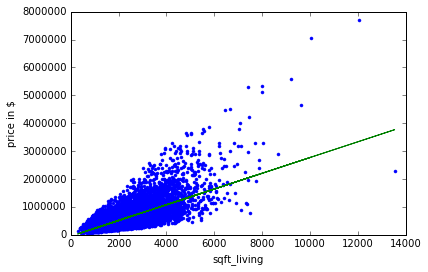

In [86]:
plt.plot(x,y,'.',x,get_regression_predictions(x,squarefeet_intercept,squarefeet_slope),'-')
plt.xlabel('sqft_living')
plt.ylabel('price in $')

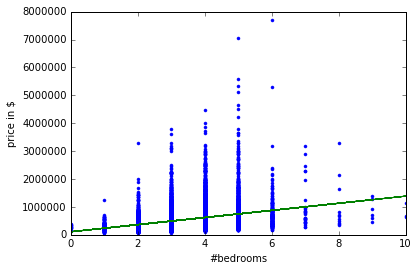

In [88]:
plt.plot(x_bedroom,y,'.',x_bedroom,get_regression_predictions(x_bedroom,bedroom_intercept,bedroom_slope),'-')
plt.xlabel('#bedrooms')
plt.ylabel('price in $')

In [93]:
rss_bedr-rss_sqfeet

217961652342490.12

From above graph we can see that price is not linearly dependent on #bedrooms. It make sense. Bigger the house higher the price.